### **Install PADELpy**

In [1]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 3.8 MB/s 


In [2]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2021-10-09 11:13:11--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-10-09 11:13:11--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-10-09 11:13:11 (46.9 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprint

In [3]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [4]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [5]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

### **Import dataset**

In [6]:
import pandas as pd

df = pd.read_csv('/content/NDM354 concise.csv')
df.head(2)

,ID,pIC50,activity,Original SMILES
0,lit1,1.41,inactive,O=C(O)CO\N=C(\c(cs1)nc1N)C(=O)N[C@@H](C2(C)C)C...
1,lit2,1.96,inactive,CC(C)C(CC)C=CC(C)C1CCC(C12C)C3C(CC2)C4(C)C(=CC...


In [7]:
df.tail(2)

,ID,pIC50,activity,Original SMILES
352,lit450,8.4,active,c1ccc(C(=O)O)c(c12)O[B](O)(O)[C@H](C2)NC(=O)c3...
353,lit451,8.8,active,C1=C[N]([S](N)(=O)=O)C(=C1C3=CC=C(N2CCOCC2)C=C...


In [8]:
df2 = pd.concat( [df['Original SMILES'],df['ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,Original SMILES,ID
0,O=C(O)CO\N=C(\c(cs1)nc1N)C(=O)N[C@@H](C2(C)C)C...,lit1
1,CC(C)C(CC)C=CC(C)C1CCC(C12C)C3C(CC2)C4(C)C(=CC...,lit2
2,c1ccccc1C(C(=O)O)C(=O)N[C@H](C2=O)[C@H](N23)SC...,lit3
3,C1C[C@H](O)C(C)(C)[C@@H]([C@]12C)CC[C@]3(C)[C@...,lit4
4,CCCc1ccc(C(=O)CCC(=O)O)cc1,CHEMBL1379384
...,...,...
349,C1=CC(=CC=C1F)C2=C([N](C=C2)[S](N)(=O)=O)C(=O)...,lit446
350,C1=CC(=CC=C1F)C2=C([N](C=C2)[S](N)(=O)=O)C(=O)...,lit448
351,CCOC(=O)N1C(=O)C2=CC=CC=C2[Se]1,lit449
352,c1ccc(C(=O)O)c(c12)O[B](O)(O)[C@H](C2)NC(=O)c3...,lit450


In [9]:
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

### **Fingerprint calculation**

In [10]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [11]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,lit1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
1,lit3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
2,lit2,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
3,CHEMBL1379384,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
4,lit5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,lit446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1
350,lit448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1
351,lit449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
352,lit451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1


In [12]:
df3 = descriptors
df3

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,lit1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
1,lit3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
2,lit2,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
3,CHEMBL1379384,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
4,lit5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,lit446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1
350,lit448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1
351,lit449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
352,lit451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1


### **Define X and Y**

In [14]:
X = descriptors.drop('Name', axis=1)
Y = df['activity']


In [15]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,SubFP1,SubFP2,SubFP3,SubFP20,SubFP23,SubFP36,SubFP38,SubFP84,SubFP88,SubFP96,SubFP100,SubFP137,SubFP143,SubFP169,SubFP179,SubFP181,SubFP184,SubFP224,SubFP274,SubFP275,SubFP287
0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1
1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
351,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1
352,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1


### **Data splitting**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape

((283, 21), (71, 21))

### **Feature importance in decision tree model**

Feature: 0, Score: 0.05079
Feature: 1, Score: 0.01184
Feature: 2, Score: 0.02843
Feature: 3, Score: 0.20241
Feature: 4, Score: 0.04407
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04694
Feature: 8, Score: 0.00482
Feature: 9, Score: 0.04254
Feature: 10, Score: 0.05688
Feature: 11, Score: 0.25210
Feature: 12, Score: 0.03676
Feature: 13, Score: 0.03854
Feature: 14, Score: 0.03394
Feature: 15, Score: 0.05656
Feature: 16, Score: 0.01779
Feature: 17, Score: 0.03953
Feature: 18, Score: 0.00347
Feature: 19, Score: 0.02484
Feature: 20, Score: 0.00776


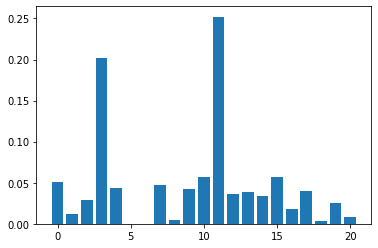

In [18]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, Y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

### **Feature importance in random forest model**

Feature: 0, Score: 0.04952
Feature: 1, Score: 0.03299
Feature: 2, Score: 0.04254
Feature: 3, Score: 0.06738
Feature: 4, Score: 0.03779
Feature: 5, Score: 0.01871
Feature: 6, Score: 0.06101
Feature: 7, Score: 0.05719
Feature: 8, Score: 0.04536
Feature: 9, Score: 0.06107
Feature: 10, Score: 0.04396
Feature: 11, Score: 0.08914
Feature: 12, Score: 0.04171
Feature: 13, Score: 0.02960
Feature: 14, Score: 0.04057
Feature: 15, Score: 0.08083
Feature: 16, Score: 0.03629
Feature: 17, Score: 0.02965
Feature: 18, Score: 0.02540
Feature: 19, Score: 0.03221
Feature: 20, Score: 0.07709


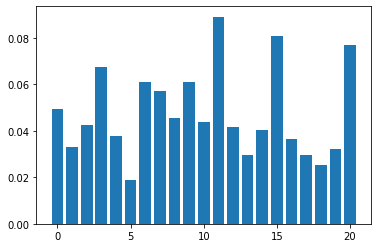

In [19]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier 
from matplotlib import pyplot

model = RandomForestClassifier()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

In [22]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=500)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.871 (0.049)


### **Feature importance in extreme gradient booster model**

Feature: 0, Score: 0.01298
Feature: 1, Score: 0.02192
Feature: 2, Score: 0.04805
Feature: 3, Score: 0.18670
Feature: 4, Score: 0.05095
Feature: 5, Score: 0.03419
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01774
Feature: 8, Score: 0.07325
Feature: 9, Score: 0.04880
Feature: 10, Score: 0.02166
Feature: 11, Score: 0.13677
Feature: 12, Score: 0.02890
Feature: 13, Score: 0.01476
Feature: 14, Score: 0.02546
Feature: 15, Score: 0.08853
Feature: 16, Score: 0.01259
Feature: 17, Score: 0.03391
Feature: 18, Score: 0.02221
Feature: 19, Score: 0.01204
Feature: 20, Score: 0.10861


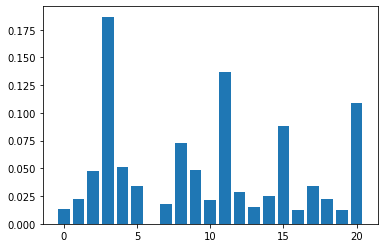

In [20]:
# xgboost for feature importance on a classification problem

from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

### **Permutation feature importance for k-neighbor model**

Feature: 0, Score: 0.03785
Feature: 1, Score: 0.01695
Feature: 2, Score: 0.00960
Feature: 3, Score: -0.00226
Feature: 4, Score: -0.00056
Feature: 5, Score: 0.00056
Feature: 6, Score: -0.00226
Feature: 7, Score: 0.01299
Feature: 8, Score: 0.00791
Feature: 9, Score: 0.02768
Feature: 10, Score: 0.02881
Feature: 11, Score: 0.01469
Feature: 12, Score: 0.00621
Feature: 13, Score: 0.00734
Feature: 14, Score: 0.00508
Feature: 15, Score: -0.00113
Feature: 16, Score: 0.00734
Feature: 17, Score: 0.02147
Feature: 18, Score: 0.00056
Feature: 19, Score: 0.00734
Feature: 20, Score: 0.01638


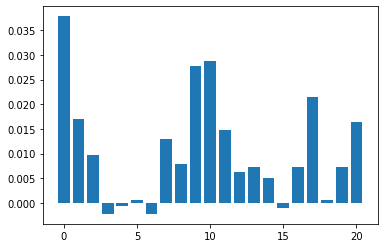

In [21]:
# permutation feature importance with knn for classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, Y)
# perform permutation importance
results = permutation_importance(model, X, Y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()